# Feature Space Mappings


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import HelpfulFunctions as hp
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

%matplotlib inline
plt.style.use('seaborn')

In [2]:
np.random.seed(56)

In [3]:
# Function to map the colors as a list from the input list of x variables
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==0:
            cols.append('blue')
        elif l==1:
            cols.append('red')
        else:
            cols.append('green')
    return cols

## Creating a Non-Linear Two Class Problem

In [4]:
x = np.random.rand(10000,2)

In [5]:
r = 0.4; c1 = 0.5; c2 = 0.5

In [6]:
y = []
for row in x:
    if (row[0]-c1)**2 + (row[1]-c2)**2 >= r*r:
        y.append(1)
    else:
        y.append(0)

Text(0, 0.5, '$x_2$')

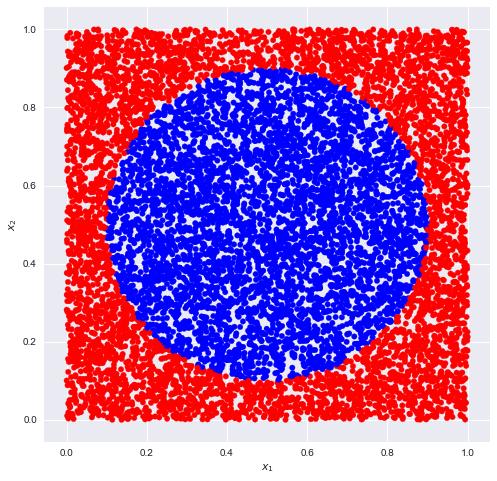

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(x[:, 0], x[:, 1], c=pltcolor(y), s=30, cmap = "plasma")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

## Using Linear Features

In [8]:
X_2 = pd.DataFrame()

In [9]:
X_2['x1'] = x[:,0]

In [10]:
X_2['x2'] = x[:,1]

In [11]:
clf = SVC(kernel = 'linear', C=1)

In [12]:
clf.fit(X_2,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [13]:
y_pred = clf.predict(X_2)

In [14]:
cm = confusion_matrix(y, y_pred)

In [15]:
print(cm)

[[2902 2057]
 [2568 2473]]


Text(0, 0.5, '$x_2$')

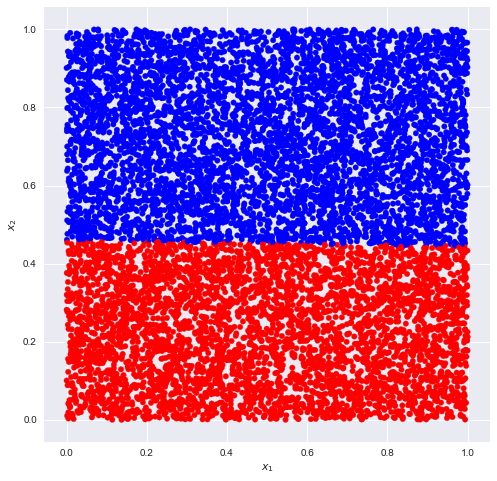

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(x[:, 0], x[:, 1], c=pltcolor(y_pred), s=30,  cmap = "plasma")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

## Classifying Using Additional Non-Linear Features

In [17]:
X_5 = X_2.copy()

In [18]:
X_5['x1_x1'] = x[:,0] * x[:,0]

In [19]:
X_5['x2_x2'] = x[:,1] * x[:,1]

In [20]:
X_5['x1_x2'] = x[:,0] * x[:,1]

In [21]:
clf = SVC(kernel = 'linear', C=1)

In [22]:
clf.fit(X_5,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
y_pred = clf.predict(X_5)

In [24]:
cm = confusion_matrix(y, y_pred)

In [25]:
print(cm)

[[4890   69]
 [  48 4993]]


In [26]:
y_col = y_pred.copy()

for i in range(0,len(y)):
    if y_pred[i] != y[i]:
        y_col[i] = 2        

Text(0, 0.5, '$x_2$')

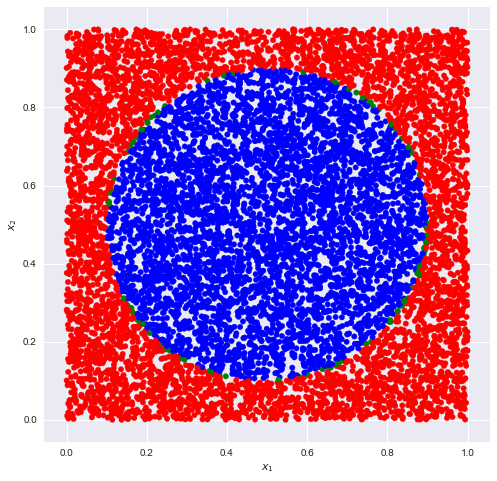

In [27]:
plt.figure(figsize=(8,8))
plt.scatter(x[:, 0], x[:, 1], c=pltcolor(y_col), s=30, cmap = "plasma")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

## SVM with Original Features and a Different Kernel

In [28]:
clf = SVC(kernel = 'rbf', C=1, gamma='auto')

In [29]:
clf.fit(X_2,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
y_pred = clf.predict(X_2)

In [31]:
cm = confusion_matrix(y, y_pred)

In [32]:
print(cm)

[[4921   38]
 [   8 5033]]


In [33]:
y_col = y_pred.copy()

for i in range(0,len(y)):
    if y_pred[i] != y[i]:
        y_col[i] = 2    

Text(0, 0.5, '$x_2$')

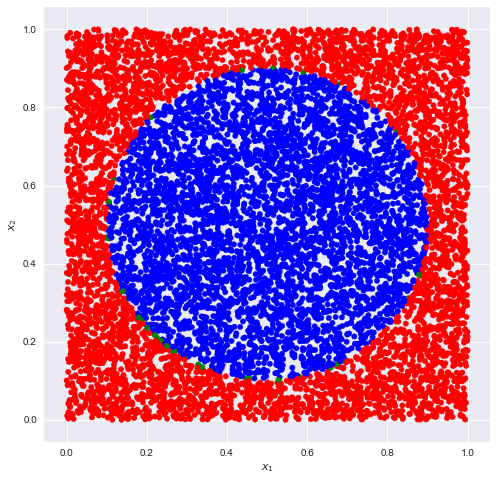

In [34]:
plt.figure(figsize=(8,8))
plt.scatter(x[:, 0], x[:, 1], c=pltcolor(y_col), s=30, cmap = "plasma")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')